# Momentum Demo

In [1]:
using PyPlot
using LinearAlgebra

┌ Warning: PyPlot is using tkagg backend, which is known to cause crashes on MacOS (#410); use the MPLBACKEND environment variable to request a different backend.
└ @ PyPlot /Users/cdesa/.julia/packages/PyPlot/XHEG0/src/init.jl:192


In [2]:
function gradient_descent(x0, A, alpha, niters)
    x = x0
    rv = zeros(niters)
    for i = 1:niters
        x = x - alpha * A * x
        rv[i] = norm(x)
    end
    return rv
end

function momentum_gd(x0, A, alpha, beta, niters)
    x = x0
    xprev = x0
    rv = zeros(niters)
    for i = 1:niters
        (x, xprev) = (x - alpha * A * x + beta * (x - xprev), x)
        rv[i] = norm(x)
    end
    return rv
end

momentum_gd (generic function with 1 method)

In [3]:
A = diagm(0 => [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]);
beta = ((sqrt(10) - 1)/(sqrt(10) + 1))^2;
alpha_mom = (2 + 2*beta) / (1 + 0.1);
alpha_gd = 2 / (1 + 0.1);

In [4]:
x0 = randn(10);

In [5]:
dists_gd = gradient_descent(x0, A, alpha_gd, 100);
dists_gd2 = gradient_descent(x0, A, 0.5*alpha_gd, 100);
dists_mom = momentum_gd(x0, A, alpha_mom, beta, 100);

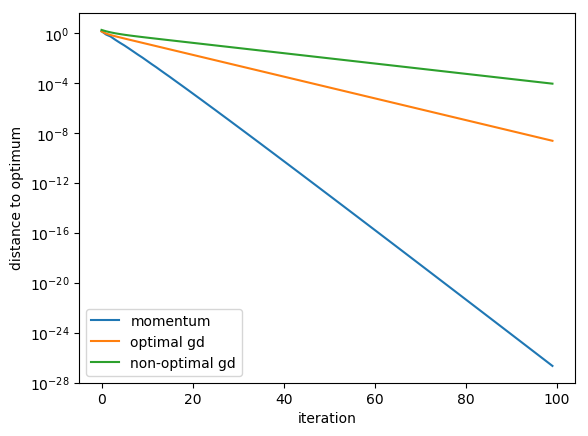

In [6]:
semilogy(dists_mom; label="momentum");
semilogy(dists_gd; label="optimal gd");
semilogy(dists_gd2; label="non-optimal gd");
legend();
xlabel("iteration");
ylabel("distance to optimum");

In [7]:
function nesterov_gd(x0, A, alpha, beta, niters)
    x = x0
    y = x0
    rv = zeros(niters)
    for i = 1:niters
        xprev = x
        x = y - alpha * A * y
        y = x + beta * (x - xprev)
        rv[i] = norm(x)
    end
    return rv
end

nesterov_gd (generic function with 1 method)

In [8]:
beta_nest = (sqrt(10) - 1)/(sqrt(10) + 1);
alpha_nest = 1;
dists_nest = momentum_gd(x0, A, alpha_nest, beta_nest, 100);

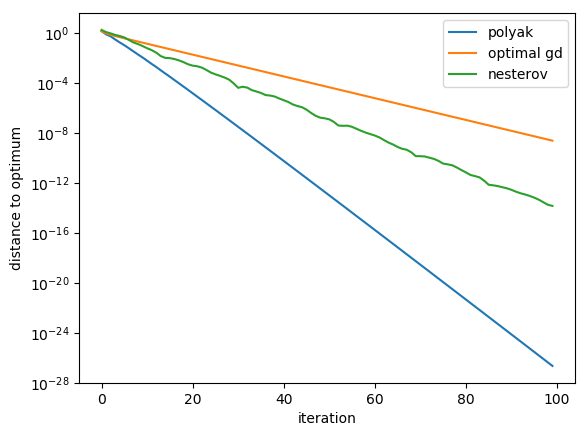

In [9]:
semilogy(dists_mom; label="polyak");
semilogy(dists_gd; label="optimal gd");
semilogy(dists_nest; label="nesterov");
legend();
xlabel("iteration");
ylabel("distance to optimum");